### Chap5 Classification

#### Naive Bayes

In [1]:
library(klaR)

Loading required package: MASS


In [2]:
loan_data <- read.csv('../psds_data/loan_data.csv')
str(loan_data)
head(loan_data, 3)

'data.frame':	45342 obs. of  21 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ status           : Factor w/ 3 levels "Charged Off",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ loan_amnt        : int  2500 5600 5375 9000 10000 21000 6000 15000 5000 5000 ...
 $ term             : Factor w/ 2 levels "36 months","60 months": 2 2 2 1 1 1 1 1 2 1 ...
 $ annual_inc       : int  30000 40000 15000 30000 100000 105000 76000 60000 50004 100000 ...
 $ dti              : num  1 5.55 18.08 10.08 7.06 ...
 $ payment_inc_ratio: num  2.39 4.57 9.72 12.22 3.91 ...
 $ revol_bal        : int  1687 5210 9279 10452 11997 32135 5963 5872 4345 74351 ...
 $ revol_util       : num  9.4 32.6 36.5 91.7 55.5 90.3 29.7 57.6 59.5 62.1 ...
 $ purpose          : Factor w/ 12 levels "car","credit_card",..: 1 10 9 3 9 3 6 3 9 3 ...
 $ home_ownership   : Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 3 4 4 4 4 4 4 4 1 ...
 $ delinq_2yrs_zero : int  1 1 1 1 1 1 1 1 0 1 ...
 $ pub_rec_zero     : int  1 1 1 1 1 1 1 1 1 1 

X,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,⋯,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.3932,1687,9.4,car,⋯,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.5717,5210,32.6,small_business,⋯,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.7160,9279,36.5,other,⋯,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60


In [3]:
naive_model <- NaiveBayes(outcome ~ purpose + home_ + emp_len_, 
                         data = na.omit(loan_data))
naive_model$table

$purpose
          var
grouping           car credit_card debt_consolidation home_improvement
  default  0.013629747 0.151515152        0.575713467      0.051916545
  paid off 0.020731331 0.187596489        0.552159146      0.063164395
          var
grouping         house major_purchase     medical      moving       other
  default  0.007895549    0.023642539 0.014335495 0.010850867 0.087556791
  paid off 0.008336642    0.032861365 0.014247276 0.009262935 0.070574743
          var
grouping   small_business    vacation     wedding
  default     0.045741255 0.006969256 0.010233338
  paid off    0.020995986 0.006263508 0.013806184

$home_
          var
grouping    MORTGAGE       OWN      RENT
  default  0.4313440 0.0832782 0.4853778
  paid off 0.4894800 0.0808963 0.4296237

$emp_len_
          var
grouping     < 1 Year   > 1 Year
  default  0.04728508 0.95271492
  paid off 0.03105289 0.96894711


注意上面显示的结果是条件概率`P(Xj|Y=i)`

In [4]:
# 对new_load进行预测
new_loan <- loan_data[147, c('purpose_', 'home_', 'emp_len_')]
row.names(new_loan) <- NULL
new_loan

purpose_,home_,emp_len_
small_business,MORTGAGE,> 1 Year


In [5]:
predict(naive_model, new_loan)

default,paid off
0.4657639,0.5342361


#### Discriminant Analysis

In [6]:
library(MASS)

In [7]:
loan3000 <- read.csv('../psds_data/loan3000.csv')
str(loan3000)
head(loan3000, 3)

'data.frame':	3000 obs. of  6 variables:
 $ X                : int  32109 16982 25335 34580 14424 35621 9920 42095 25219 26196 ...
 $ outcome          : Factor w/ 2 levels "default","paid off": 2 1 2 2 1 2 1 2 2 2 ...
 $ purpose_         : Factor w/ 7 levels "credit_card",..: 2 1 2 4 2 2 2 2 2 2 ...
 $ dti              : num  21.2 15.5 27.3 21.1 16.5 ...
 $ borrower_score   : num  0.4 0.4 0.7 0.4 0.45 0.5 0.4 0.4 0.55 0.45 ...
 $ payment_inc_ratio: num  5.11 5.43 9.23 2.33 12.1 ...


X,outcome,purpose_,dti,borrower_score,payment_inc_ratio
32109,paid off,debt_consolidation,21.23,0.4,5.11135
16982,default,credit_card,15.49,0.4,5.43165
25335,paid off,debt_consolidation,27.30,0.7,9.23003


In [8]:
loan_lda <- lda(outcome ~ borrower_score + payment_inc_ratio, 
               data = loan3000)
loan_lda$scaling

,LD1
borrower_score,7.17583880
payment_inc_ratio,-0.09967559


In [9]:
loan_lda

Call:
lda(outcome ~ borrower_score + payment_inc_ratio, data = loan3000)

Prior probabilities of groups:
  default  paid off 
0.4816667 0.5183333 

Group means:
         borrower_score payment_inc_ratio
default       0.4628028          8.861813
paid off      0.5390675          7.465199

Coefficients of linear discriminants:
                          LD1
borrower_score     7.17583880
payment_inc_ratio -0.09967559

In [10]:
# Predictions
pred <- predict(loan_lda)
head(pred$posterior)

default,paid off
0.5535437,0.4464563
0.5589534,0.4410466
0.2726962,0.7273038
0.5062538,0.4937462
0.6099525,0.3900475
0.4107406,0.5892594


In [11]:
lda_df <- cbind(loan3000, prob_default=pred$posterior[,'default'])

In [12]:
# lda_df0(计算分界线)
x <- seq(from=.33, to=.73, length=100)
y <- seq(from=0, to=20, length=100)
newdata <- data.frame(borrower_score=x, payment_inc_ratio=y)
pred <- predict(loan_lda, newdata=newdata)
lda_df0 <- cbind(newdata, outcome=pred$class)

Warning message:
“Removed 18 rows containing missing values (geom_point).”

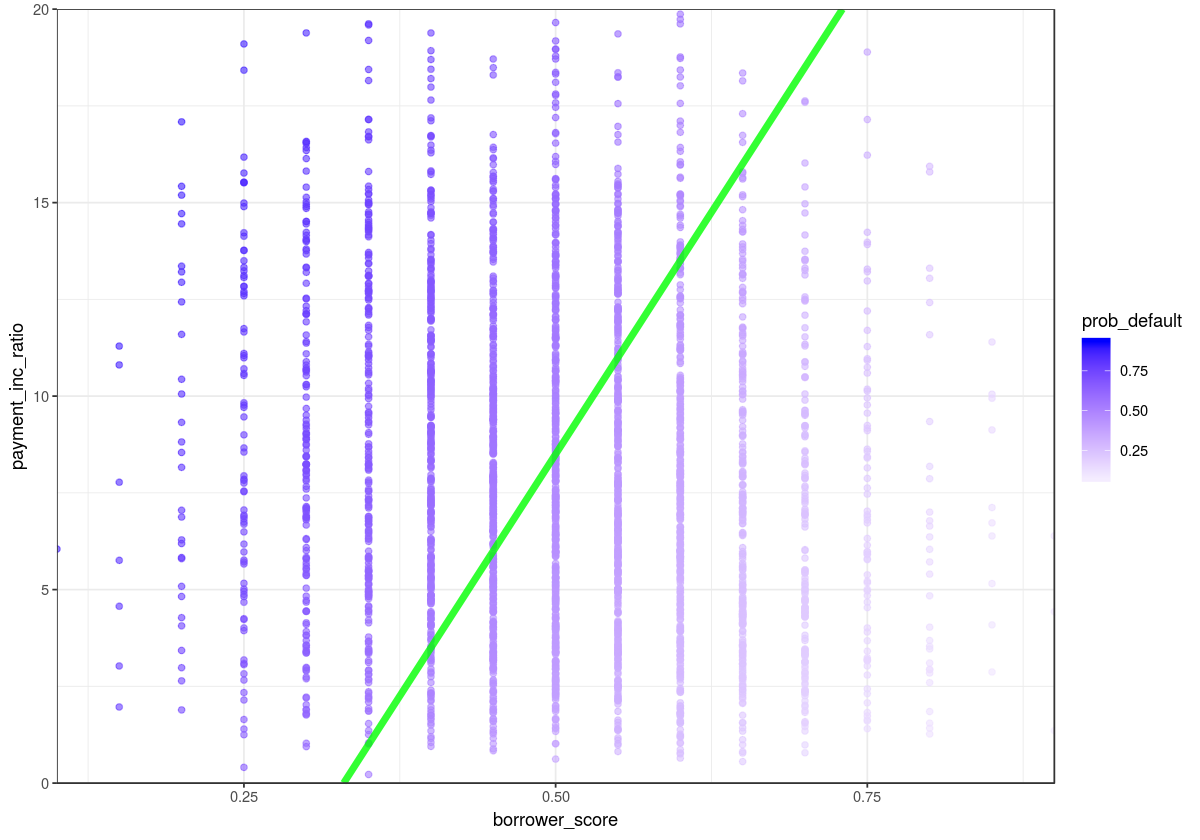

In [13]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.hight=7)
ggplot(data=lda_df, aes(x=borrower_score, y=payment_inc_ratio, color=prob_default)) +
  geom_point(alpha=.6) +
  scale_color_gradient2(low='white', high='blue') +
  scale_x_continuous(expand=c(0,0)) + 
  scale_y_continuous(expand=c(0,0), lim=c(0, 20)) + 
  geom_line(data=lda_df0, col='green', size=2, alpha=.8) +
  theme_bw()

#### Logistic Regression

In [14]:
logistic_model <- glm(outcome ~ payment_inc_ratio + purpose_ + 
                        home_ + emp_len_ + borrower_score,
                      data=loan_data, family='binomial')
logistic_model


Call:  glm(formula = outcome ~ payment_inc_ratio + purpose_ + home_ + 
    emp_len_ + borrower_score, family = "binomial", data = loan_data)

Coefficients:
               (Intercept)           payment_inc_ratio  
                  -1.63809                    -0.07974  
purpose_debt_consolidation    purpose_home_improvement  
                  -0.24937                    -0.40774  
    purpose_major_purchase             purpose_medical  
                  -0.22963                    -0.51048  
             purpose_other      purpose_small_business  
                  -0.62066                    -1.21526  
                  home_OWN                   home_RENT  
                  -0.04833                    -0.15732  
         emp_len_ > 1 Year              borrower_score  
                   0.35673                     4.61264  

Degrees of Freedom: 45341 Total (i.e. Null);  45330 Residual
Null Deviance:	    62860 
Residual Deviance: 57510 	AIC: 57540

In [15]:
summary(logistic_model)


Call:
glm(formula = outcome ~ payment_inc_ratio + purpose_ + home_ + 
    emp_len_ + borrower_score, family = "binomial", data = loan_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.15528  -1.07421   0.05853   1.06908   2.51951  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.638092   0.073708 -22.224  < 2e-16 ***
payment_inc_ratio          -0.079737   0.002487 -32.058  < 2e-16 ***
purpose_debt_consolidation -0.249373   0.027615  -9.030  < 2e-16 ***
purpose_home_improvement   -0.407743   0.046615  -8.747  < 2e-16 ***
purpose_major_purchase     -0.229628   0.053683  -4.277 1.89e-05 ***
purpose_medical            -0.510479   0.086780  -5.882 4.04e-09 ***
purpose_other              -0.620663   0.039436 -15.738  < 2e-16 ***
purpose_small_business     -1.215261   0.063320 -19.192  < 2e-16 ***
home_OWN                   -0.048330   0.038036  -1.271    0.204    
home_RENT                  -0.

In [16]:
pred <- predict(logistic_model)
summary(pred)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.509606 -0.505061  0.008539 -0.002564  0.518825  2.704774 

注意返回的$\hat{Y}$不是概率值，$\hat{p}$才是概率值：
$$\hat{p} = \frac{1}{1+e^{-\hat{Y}}}$$

In [17]:
prob <- 1/(1+exp(-pred))
summary(prob)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02904 0.37635 0.50213 0.50000 0.62687 0.93731 

In [18]:
library(mgcv)
logistic_gam <- gam(outcome ~ s(payment_inc_ratio) + purpose_ + 
                      home_ + emp_len_ + s(borrower_score),
                    data=loan_data, family='binomial')
logistic_gam

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.



Family: binomial 
Link function: logit 

Formula:
outcome ~ s(payment_inc_ratio) + purpose_ + home_ + emp_len_ + 
    s(borrower_score)

Estimated degrees of freedom:
7.45 4.17  total = 21.61 

UBRE score: 0.2681413     

In [19]:
terms <- predict(logistic_gam, type='terms')
partial_resid <- resid(logistic_gam) + terms
df <- data.frame(payment_inc_ratio = loan_data[, 'payment_inc_ratio'],
                 terms = terms[, 's(payment_inc_ratio)'],
                 partial_resid = partial_resid[, 's(payment_inc_ratio)'])

<span style="color:red">WARNING: 关于`logistic_gam`模型这里有些问题，代码都是根据书上的代码来的，也没发现什么错误，但是下面的图和后面的Confusion matrix，ROC曲线都和书上的不同...一时找不出错误，等后面review的时候再找找看吧.</span>



Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_path).”

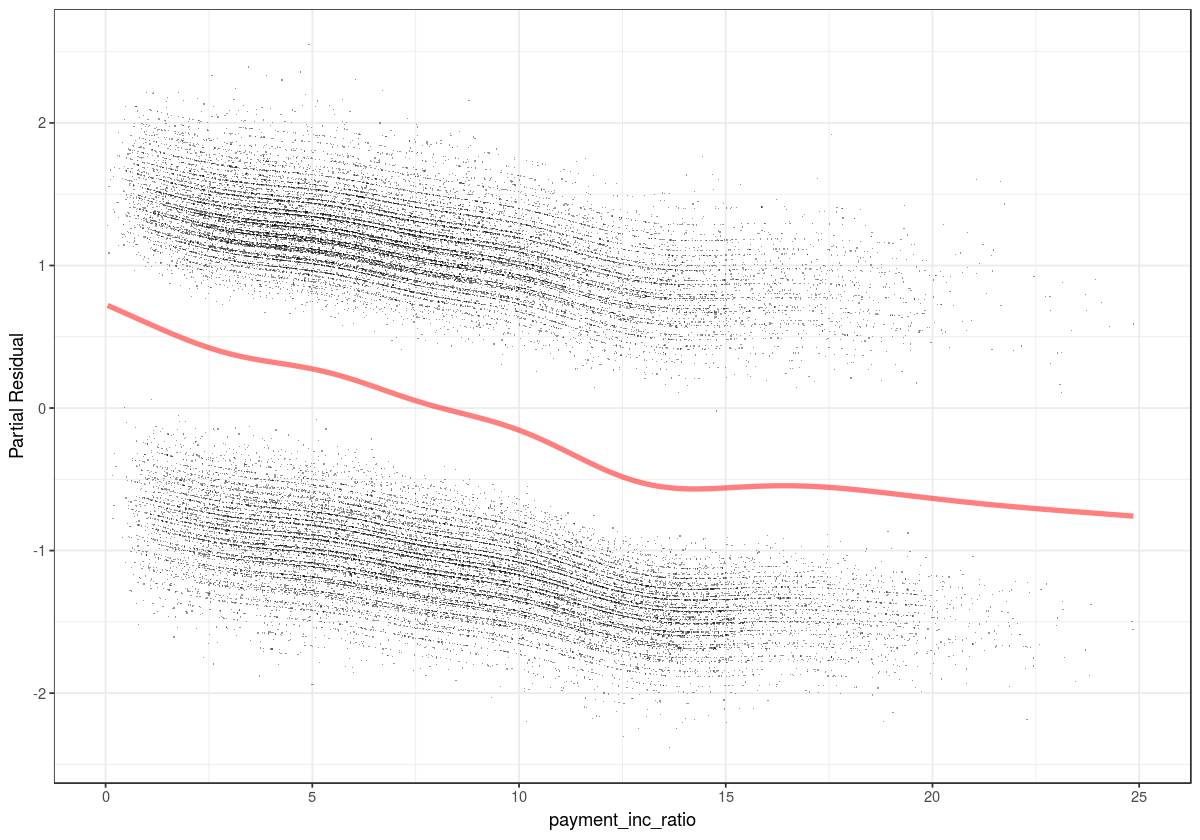

In [20]:
ggplot(df, aes(x=payment_inc_ratio, y=partial_resid, solid = FALSE)) +
  geom_point(shape=46, alpha=.4) +
  geom_line(aes(x=payment_inc_ratio, y=terms), 
            color='red', alpha=.5, size=1.5) +
  labs(y='Partial Residual') +
  xlim(0, 25) +
  theme_bw()

#### Evaluating Classification Methods

In [21]:
# Confusion matrix
pred <- predict(logistic_gam, newdata=loan_data)
pred_y <- as.numeric(pred > 0)
true_y <- as.numeric(loan_data$outcome=='default')
true_pos <- (true_y==1) & (pred_y==1)
true_neg <- (true_y==0) & (pred_y==0)
false_pos <- (true_y==0) & (pred_y==1)
false_neg <- (true_y==1) & (pred_y==0)
conf_mat <- matrix(c(sum(true_pos), sum(false_pos),
                     sum(false_neg), sum(true_neg)), 2, 2)
colnames(conf_mat) <- c('Yhat = 1', 'Yhat = 0')
rownames(conf_mat) <- c('Y = 1', 'Y = 0')
conf_mat

,Yhat = 1,Yhat = 0
Y = 1,8376,14295
Y = 0,14619,8052


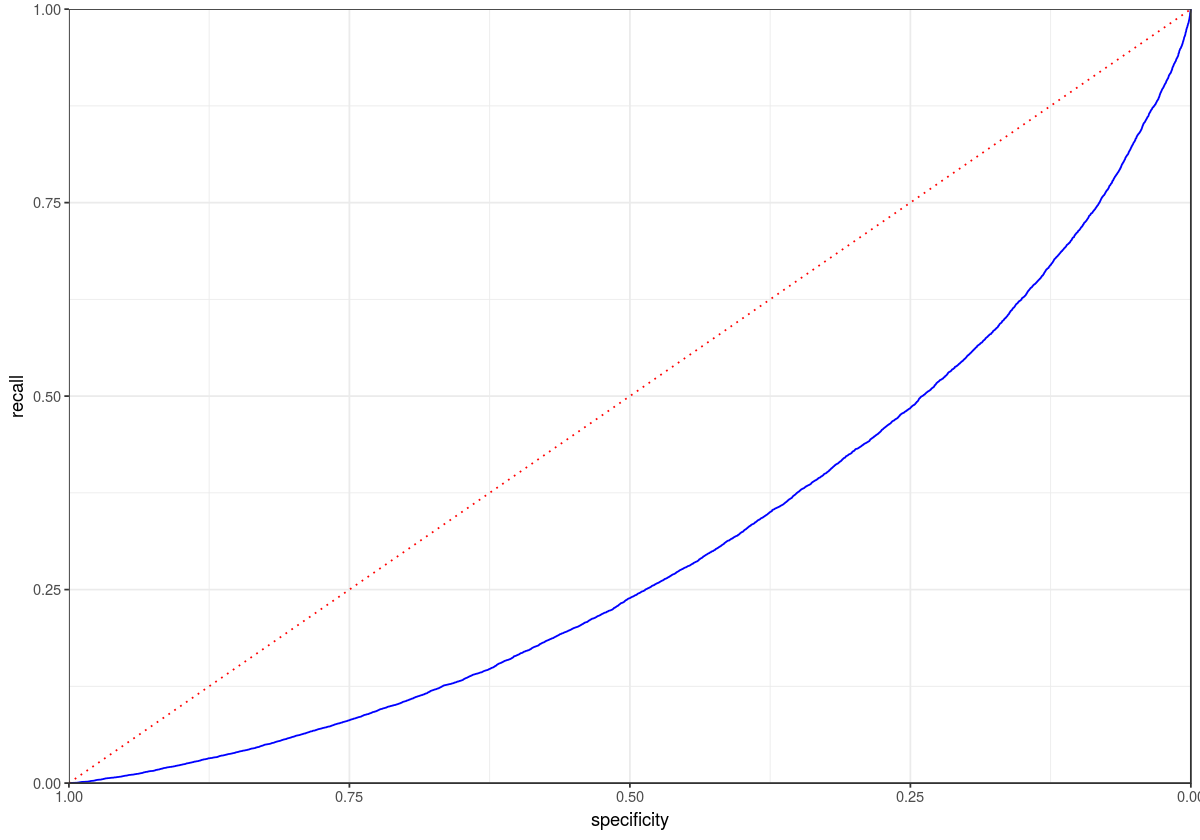

In [22]:
# ROC
idx <- order(-pred)
recall <- cumsum(true_y[idx]==1)/sum(true_y==1)
specificity <- (sum(true_y==0) - cumsum(true_y[idx]==0))/sum(true_y==0)
roc_df <- data.frame(recall = recall, specificity = specificity)
ggplot(roc_df, aes(x=specificity, y=recall)) +
  geom_line(color='blue') + 
  scale_x_reverse(expand=c(0, 0)) +
  scale_y_continuous(expand=c(0, 0)) + 
  geom_line(data=data.frame(x=(0:100)/100), aes(x=x, y=1-x),
            linetype='dotted', color='red') +
  theme_bw()

In [23]:
sum(roc_df$recall[-1] * diff(1 - roc_df$specificity))

[1] 0.307383

#### Strategies for Imbalanced Data

给的数据集和书上数据集不一致...